# Decodificación señales PWM

El objetivo de este ejercicio es desarrollar una función que obtenga la secuencia de símbolos a partir de las muestras pwm.

La estrategia para decodificar será:

* Localizar el comienzo de cada símbolo como aquella muestra que vale 1 y va precedida de un cero. Dicho de otro modo, una transición 0-->1 tendremos el comienzo de un símbolo.


* Cada vez que tengamos el comienzo de un símbolo, como concemos la duración, formaremos un bloque de muestras de dicho tamaño empezando en el comienzo del símbolo.

* La suma de las muestras del bloque indicará el símbolo.

In [1]:
#Importaremos los módulos necesarios
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
matplotlib.rcParams['figure.figsize'] = (10.0, 5)

## Programación pwm_starts()

Cree una función pwm_starts que reciba como argumentos:

* Un vector de numpy  muestras de una señal pwm


y devuelva una **lista** con los índices donde se producen transiciones 0-->1

In [2]:
def pwm_starts(pwm):
    '''
    Resultado esperado
    
    [2,7]=pwm_starts( np.array([0,0,1,1,0,0,0,1,1,1,0,0,0]) )    

    El resultado DEBE SER UNA LISTA
    '''
    indices= []
### BEGIN SOLUTION
    
    longitud=len(pwm)
    for k in range(1,longitud):
        if pwm[k]>0.5 and pwm[k-1] < 0.5:
            indices.append(k)
### END SOLUTION
    return indices
    



### Prueba de la función desarrollada

Cargaremos una señal pwm y probaremos que todo funciona.

El resultado debe ser una serie de números equiespaciados



In [3]:
# Primera comprobación de si está bien
pwm_starts( np.array([0,0,1,1,0,0,0,1,1,1,0,0,0]) )  

# debe devolver [2,7]

[2, 7]

In [7]:
# Cargamos tanto una señal pwm  más larga y los simbolos que la originaron
pwm=np.load('signals/pwm_ref.npy')
simbolos=np.load('signals/simbolos_ref.npy')

#Ejecutamos la funcion
inicios= pwm_starts(pwm)
print(inicios)
# Debe imprimir una lista de transiciones 0-->1
for k in inicios:
    print(f'pwm[{k-1}:{k}] =', pwm[k-1:k+1])

[62, 87, 112, 137, 162, 187, 212, 237, 262, 287, 312, 337, 362, 387, 412, 437, 462, 487, 512, 537, 562, 587, 612, 637, 662]
pwm[61:62] = [0. 1.]
pwm[86:87] = [0. 1.]
pwm[111:112] = [0. 1.]
pwm[136:137] = [0. 1.]
pwm[161:162] = [0. 1.]
pwm[186:187] = [0. 1.]
pwm[211:212] = [0. 1.]
pwm[236:237] = [0. 1.]
pwm[261:262] = [0. 1.]
pwm[286:287] = [0. 1.]
pwm[311:312] = [0. 1.]
pwm[336:337] = [0. 1.]
pwm[361:362] = [0. 1.]
pwm[386:387] = [0. 1.]
pwm[411:412] = [0. 1.]
pwm[436:437] = [0. 1.]
pwm[461:462] = [0. 1.]
pwm[486:487] = [0. 1.]
pwm[511:512] = [0. 1.]
pwm[536:537] = [0. 1.]
pwm[561:562] = [0. 1.]
pwm[586:587] = [0. 1.]
pwm[611:612] = [0. 1.]
pwm[636:637] = [0. 1.]
pwm[661:662] = [0. 1.]


In [ ]:
# Celda de Evaluación automática
### BEGIN HIDDEN TESTS
### HASHED AUTOTEST pwm_starts(np.array([0,0,0,1,1,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,]))
### END HIDDEN TESTS


## Programación decodificador

Se le pide que programe un decodificador PWM.

* Empleando la función *pwm_starts()* determinará los comienzos de cada símbolo

* Sabiendo donde comienza cada símbolo y su duración simplemente sumará el rango de muestras adecuado para obtener cada símbolo



In [8]:
def PWM_decod(pwm, duracion_simbolo):
    '''
    A partir de las muestras pwm y conocida la duración del simbolo, devuelve la secuencia de símbolos 
    '''

    # Determinar donde empiezan los símbolos
    comienzos = pwm_starts(pwm)    
    
    #creamos una lista vacía para ir almancendo el resultado
    simbolos=[]
    for c in comienzos:
     ### BEGIN SOLUTION
        simbolos.append(np.sum(pwm[c:c+duracion_simbolo]))
     ### END SOLUTION
        
    return simbolos

### Comprobación decodificador

Ejecute los siguientes bloques y verifique que funciona correctamente.

El resultado decodificado y transmitido deben ser idénticos.



Decodificado: [15.0, 10.0, 10.0, 1.0, 2.0, 14.0, 11.0, 8.0, 13.0, 16.0, 19.0, 20.0, 13.0, 10.0, 6.0, 1.0, 20.0, 18.0, 19.0, 1.0, 15.0, 17.0, 1.0, 10.0, 12.0]
Transmitidos: [15 10 10  1  2 14 11  8 13 16 19 20 13 10  6  1 20 18 19  1 15 17  1 10
 12]


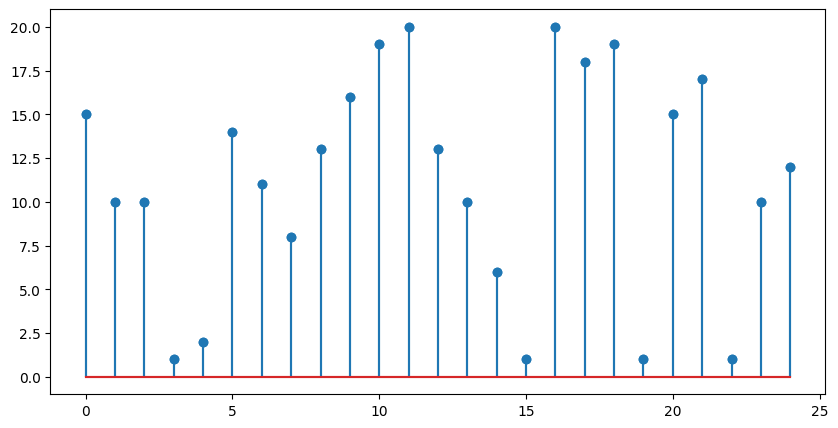

In [9]:
# Celda para auto-comprobación del decodificador
duracion_simbolo = 25
dec= PWM_decod(pwm,duracion_simbolo)
print('Decodificado:',dec)
print('Transmitidos:',simbolos)
#Deben coincidir transmitidos y decodificados

#Estas dos gráficas deben solaparse
_=plt.stem(dec)
_=plt.stem(simbolos)

In [12]:
# Celda de Evaluación automática
### BEGIN HIDDEN TESTS
pwm_ref=np.load('pwm_ref.npy')
### HASHED AUTOTEST  PWM_decod(pwm_ref[100:400], 25)
### END HIDDEN TESTS

## Determinacion de la duración de símbolo

En la función *PWM_decod(pwm, duracion_simbolo)* era necesario introducir la duración del símbolo.

Sin embargo la duración del símbolo está implícita en la propia señal pwm. Dado que todos los símbolos tienen la misma duración, es posible estimar dicha duración:

* Se determinan los instantes de tiempo donde comienzan los distintos símbolos mediante pwm_starts()

* Se determinan las diferencias entre instantes consecutivos.

    * Por ejemplo si instantes=\[ 11,26,41,56 \], las diferencias entre instantes consecutivos serían \[15,15,15\].
    * Observar que la cantidad de diferencias (3 en este caso) es uno menos que la cantidad de instantes (4 en este caso)

* Se calcula la media o la mediana de dichas diferencias.

Programe una función *estima_periodo_pwm(pwm)* que:

* reciba las muestras pwm

* Devuelva el periodo de simbolo
  * A partir de las diferencias de tiempo entre instantes de comienzo de símbolo


In [28]:
def estima_periodo_pwm(pwm):
    '''
    Estima el periodo de simbolo de una señal pwm
    Debe devolver un entero
    '''
    st = pwm_starts(pwm)
    assert len(st)>0,"La señal no contiene pulsos pwm"
    periodo = None # Valor a calcular
    
    ### BEGIN SOLUTION
    periodo=int(np.mean(np.diff(st)))
    ### END SOLUTION

    return periodo
    

### Prueba determinacion duracion de simbolo

In [30]:

# Comprobación por el estudiante


pwm=np.load('signals/pwm_ref.npy')
periodo = estima_periodo_pwm(pwm)

# El resultado debe ser un entero
if not isinstance(periodo,int):
    print(f"ERROR!!!: Periodo={periodo} debe ser de tipo int y es de tipo {type(periodo)}")

# El resultado debe ser "25"          
print('Periodo Estimado:',periodo)

Periodo Estimado: 25


In [31]:
# Celda de Evaluación automática
### BEGIN HIDDEN TESTS
tt=np.zeros(1000)
tt[53:700:19]=1
### HASHED AUTOTEST  estima_periodo_pwm(tt)
ttt=np.zeros(700)
ttt[113::27]=1
### HASHED AUTOTEST  estima_periodo_pwm(tt)
### END HIDDEN TESTS

## Programación versión final PWM_decod(pwm)

En la anterior versión de la función era necesario introducir tanto las muestras pwm como la duracion del símbolo.

Modifique la función para que recibiendo únicamente las muestras pwm sea posible decodificar.

Debe  Integrar el código de las funciones parciales que ha ido implementando en esta.


In [36]:
def PWM_decod2(pwm):
    '''
    A partir de las muestras pwm  devuelve la secuencia de símbolos
    
    '''
    simbolos=None # Debe calcular los simbolos
### BEGIN SOLUTION
    periodo=estima_periodo_pwm(pwm)
    simbolos=PWM_decod(pwm,periodo)
### END SOLUTION
    if isinstance(simbolos,list):
        simbolos=np.array(simbolos)
    return simbolos

### Comprobación versión final de PWM_decod(pwm)

Decodificado: [15. 10. 10.  1.  2. 14. 11.  8. 13. 16. 19. 20. 13. 10.  6.  1. 20. 18.
 19.  1. 15. 17.  1. 10. 12.]
Transmitidos: [15 10 10  1  2 14 11  8 13 16 19 20 13 10  6  1 20 18 19  1 15 17  1 10
 12]


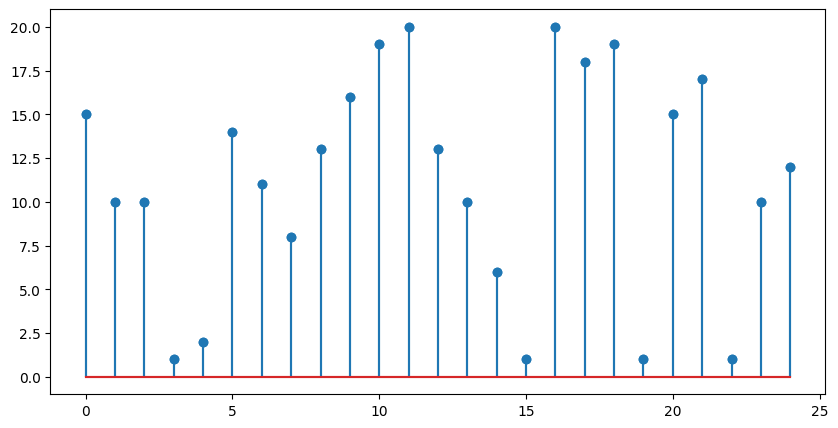

In [37]:

dec= PWM_decod2(pwm)
print('Decodificado:',dec)
print('Transmitidos:',simbolos)
_=plt.stem(dec)
_=plt.stem(simbolos)

### Las dos gráficas deben solaparse


In [40]:
# Comprobación por el estudiante
if np.all(dec.astype('int')==simbolos):
    print ("Enhorabuena!! La secuencia decodificada coincide con la transmitida")
else:
    print ("Hay diferencias entre la decodificada y la transmitida")
    print("Diferencias:",(dec.astype('int')==simbolos))
    print("REVISE sus funciones!!!")

Enhorabuena!! La secuencia decodificada coincide con la transmitida


In [ ]:
# Celda para corrección automática

### BEGIN HIDDEN TESTS
### HASHED AUTOTEST PWM_decod2(pwm)
### END HIDDEN TESTS